<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project 2 - The Damped Harmonic Oscillator

Yunhao Mo<br>
University of Manchester  
April 2021

In this project, we have investigated the Damped Harmonic Oscillator by using numerical methods. In a spring-mass system that suffered an external force, $F(t)$, the equation of motion is given by  
\begin{equation*}
ma(t)+bv(t)+kx(t)=F(t)
\end{equation*}  
, where $x(t)$ is the position function, $v(t)$ is the velocity function, $a(t)$ is the acceleration function, and the rest of coefficient follows the usual convention.  
We first initialise our Python interpreter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath 
plt.rcParams.update({'font.size': 14})
plt.style.use('default')

# 1: Four numerical methods
In this case, we try to solve the equation of motion when there is no external force, $F(t)=0$, by using four numerical methods(Euler, Improved Euler, Verlet and Euler-Cromer).  
Here we have defined some constants' values and initialized some arrays.

In [2]:
#All of units of parameters defined in this project fowllow the SI units. 
k = 0.95 #in kg/s^2 given in Class list
m = 2.37  #in kg given in Class list
b = 0.2 #in kg/s
T = 200 #Time limitation in second
h = 0.01 #Time interval in second
t = np.arange(0,T,h) #time array in second
nstep = len(t) #number of time intervals in second
x0 = 0 #initial position in meters
v0 = -1 #initial velocity in m/s
x = np.zeros(nstep) #position array in meters
v = np.zeros(nstep) #velocity array in m/s

## 1.1: Analytical method
We have tried to derive the analytical equation, which can be compared with four numerical methods. There are two equations we have derived depending on the value of the damping term $b$.
1. when $b \neq b_{cr}$   
$$x(t) = e^{-\frac{\gamma t}{2}}(Ae^{i\omega t}+Be^{-i\omega t})$$  
$$v(t) = \frac{dx(t)}{dt} = \frac{1}{2}e^{-\frac{t}{2}(\gamma+2i\omega)}(-B(\gamma+2i\omega)+iAe^{2it\omega}(i\gamma+2\omega))$$  
Since we know the initial value of position and velocity, we can work out the values of A and B by   
$$A=\frac{2v_0+\gamma x_0+2x_0i\omega}{4i\omega}$$    
$$B=x_0-A$$    
,where$x_0$ is the position at $t=0$ and $v_0$ is the velocity at $t=0$      
2. when $b=b_{cr}=2\sqrt{km}$
$$x(t) = Ae^{-\frac{\gamma t}{2}}+Bte^{-\frac{\gamma t}{2}}$$  
$$v(t) = -\frac{\gamma}{2}Ae^{-\frac{\gamma t}{2}}+Be^{-\frac{\gamma t}{2}}-\frac{\gamma}{2}Bte^{-\frac{\gamma t}{2}}$$   
Still, after substituting the initial values of position and velocity, we get
$$A = x_0$$  
$$B = v_0 + \frac{\gamma x_0}{2}$$  
Using these equations, we can write the following program with the analytical function to calculate the expected position array and the expected velocity array.

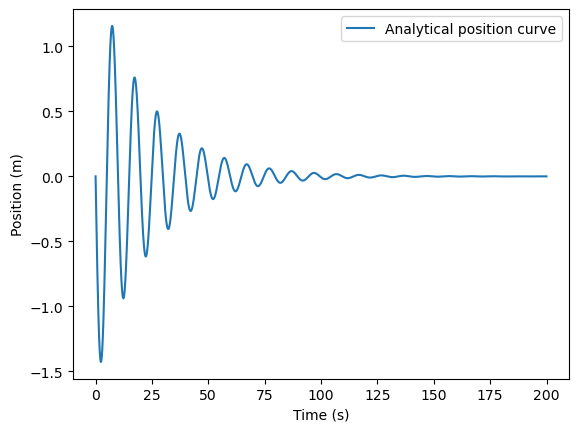

In [3]:
def analytical (k,m,b,x0,v0,h,T):
    t = np.arange(0,T,h)
    nstep = len(t)
    #calculate the natural angular frequency
    w0 = np.sqrt(k/m)
    #calculate the critical damping term
    b_cr = 2 * np.sqrt(k * m)
    gamma = b / m
    w = cmath.sqrt(w0**2 - gamma**2 / 4)
    x_expect = np.zeros(nstep)
    if b != b_cr:
        #when damping term is not equal to the critical damping term.
        #calculate two constants
        A = (2 * v0 + gamma * x0 + 2 * x0 * 1j * w) / (4j * w)
        B = x0 - A
        x_expect = np.real(np.exp(-gamma * t / 2) * (A * np.exp(1j * w * t) + B * np.exp(-1j * w *t)))
        v_expect = np.real(0.5 * np.exp(-0.5 * t * (gamma + 2j * w)) * (-B * (gamma + 2j * w) + 1j * A * \
                           np.exp(2j * t * w) * (1j * gamma + 2 * w)))
        return x_expect, v_expect
    else:
        #when damping term is equal to the critical damping term
        A = x0
        B = v0 + gamma / 2 * x0
        x_expect = np.real(A * np.exp(-gamma * t / 2) + B * t * np.exp(-gamma * t / 2))
        v_expect = np.real(-gamma / 2 * A * np.exp(-gamma / 2 *  t) + B * np.exp(-gamma / 2 * t) + B * t * \
                           (-gamma / 2) * np.exp(-gamma * t / 2))
        return x_expect,v_expect

#calculate the expected position and velocity arrays.
x_expect,v_expect = analytical(k,m,b,x0,v0,h,T)
#plot a figure.
plt.plot(t,x_expect,label='Analytical position curve')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

## 1.2: Euler Method
When the external force is zero, according to the equation of motion, we have  
$$a(t)=-\frac{k}{m}x(t)-\frac{b}{m}v(t).$$  
During $i^{th}$ time interval, we assumed the acceleration and velocity do not change. Therefore, the equations of position and velocity at $(i+1)^{th}$ time interval are   
$$x_{i+1}=x_i+hv_i$$  
$$v_{i+1}=v_{i}+ha_i$$  
,where the acceleration is  
$$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$$  
By using these iterative equations, we can calculate acceleration firstly, the position and velocity in the next time interval can be found.  
Here is the program to calculate the position and velocity by using the Euler method and generate the corresponding figure.

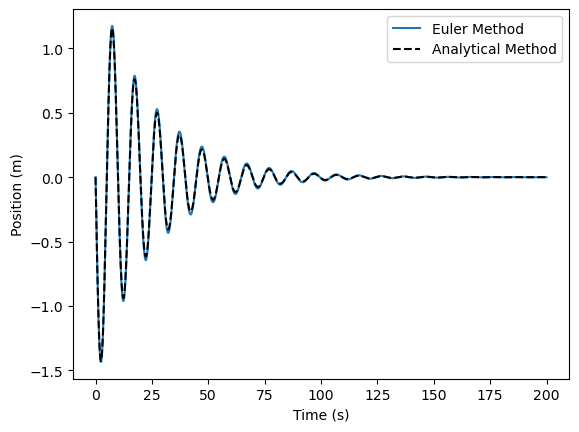

In [4]:
def Euler(x0,v0,k,m,b,h,T):
    #this is the Euler Method
    #initialize time, position and velocity.
    t = np.arange(0,T,h)
    nstep = len(t)
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    x[0] = x0 
    v[0] = v0
    #calculate position and velocity by using iterative equations
    for i in range(nstep-1):  
        #using the iterative equations.
        a = -(k / m) * x[i] - (b / m) * v[i] 
        x[i+1] = x[i] + h * v[i] 
        v[i+1] = v[i] + h * a 
    return x,v

#calculate the position array and velocity array. 
x_euler,v_euler = Euler(x0,v0,k,m,b,h,T)
#plot a figure.
plt.plot(t,x_euler,label='Euler Method')
plt.plot(t,x_expect,'k--',label='Analytical Method')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

## 1.3: Improved Euler Method
Compared with the Euler Method, we expect the position function is changed with constant acceleration during a time interval. Therefore, just like this method's name, it is more accurate than the Euler method. The iterative equations are   
$$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$$  
$$x_{i+1}=x_i+h_it+\frac{1}{2}h^2a_i$$  
$$v_{i+1}=v_i+ha_i$$  
Here is the program to calculate the position and velocity by using the Improved Euler method and generate a corresponding figure.

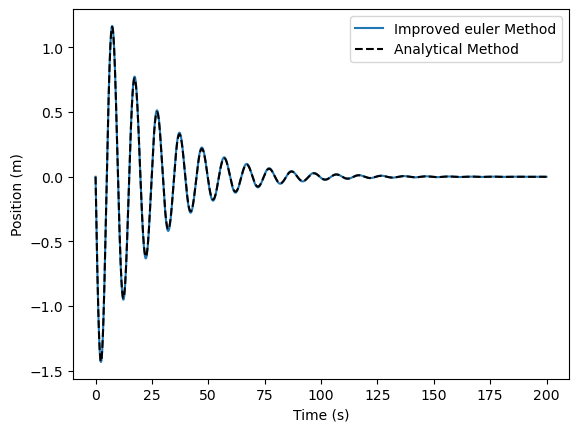

In [5]:
def Improved_Euler(x0,v0,k,m,b,h,T):
    #This is the Improved Euler Method
    #Initialise time, position and velocity
    t = np.arange(0,T,h) 
    nstep = len(t) 
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    x[0] = x0
    v[0] = v0
    #calculate position and velocity by using iterative equations
    for i in range(nstep-1):
        a = -(k / m) * x[i] - (b / m) * v[i]
        x[i+1] = x[i] + h * v[i] + h**2 / 2 * a
        v[i+1] = v[i] + h * a
    return x,v

#calculate the position and velocity arrays.
x_improved,v_improved = Improved_Euler(x0,v0,k,m,b,h,T)
#plot a figure
plt.plot(t,x_improved,label='Improved euler Method')
plt.plot(t,x_expect,'k--',label='Analytical Method')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

## 1.3: Verlet's Method
Compared with Euler and Improved Euler method, the velocity function in the Verlet's Method is derived from the centred derivative of position function.  
$$v_{i}=\frac{x_{i+1}-x_{i-1}}{2h}$$  
Therefore, the acceleration function is  
$$a_{i}=\frac{1}{h}(\frac{x_{i+1}-x_i}{h} - \frac{x_i-x_{i-1}}{h})=\frac{x_{i+1}+x_{i-1}-2x_i}{h^2}$$
We also know the acceleration function can be expressed as
$$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$$  
Hence, after substituting it into the acceleration equation derived from the position function, we can get the numerical equation of position in terms of $m, k, h$ and $b$.
$$x_{i+1}=Ax_i+Bx_{i-1}$$  
,where $A=2\frac{2m-kh^2}{2m+bh}$ and $B=\frac{bh-2m}{2m+bh}$.   
Here is the program to calculate the position and velocity by using the Verlet's Euler method and generate a corresponding figure.

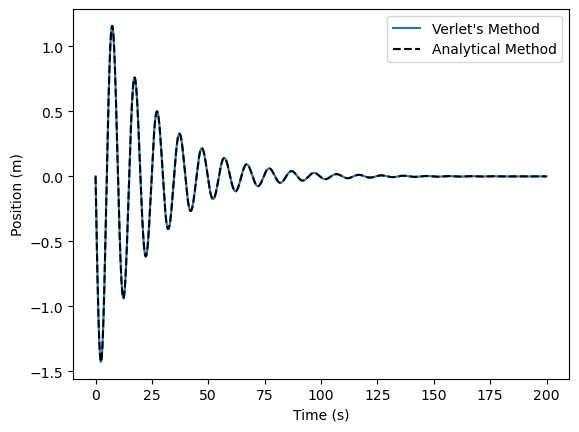

In [6]:
def Verlet(x0,v0,k,m,b,h,T):
    #initialize time, position and velocity.
    t = np.arange(0,T,h)
    nstep = len(t)
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    x[0] = x0
    v[0] = v0
    D = 2 * m + b * h
    A = 2 * (2 * m - k * h**2) / D
    B = (b * h - 2 * m) / D
    #because in the Verlet's Method, the x start from index of 1, we need to calculate the x1 by improved euler method
    a_0 = -(k / m) * x[0] - (b / m) * v[0]
    x[1] = x0 + h * v[0] + (h**2 / 2) * a_0
    #calculate the position and velocity by using the iterative equations.
    for i in np.arange(1, nstep-1):
        x[i+1] = A * x[i] + B * x[i-1]
        v[i] = (x[i+1] - x[i-1]) / (2 * h)
    #we also need to calculate the final velocity in the array.
    a = -(k / m) * x[-2] - (b / m) * v[-2]
    v[-1] = v[-2] + h * a
    return x,v

x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
plt.plot(t,x_verlet,label='Verlet\'s Method')
plt.plot(t,x_expect,'k--',label='Analytical Method')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.show()

## 1.4: Euler-Cromer Method
In this case, the iterative equations of the Euler-Cromer Method are  
$$a_i=-\frac{k}{m}x_i-\frac{b}{m}v_i$$  
$$x_{i+1}=x_i+hv_{i+1}$$  
$$v_{i+1}=v_i+ha_i$$  
Compared with the Euler Method and the Improved Euler Method, the advantage of this method is that the energy is conserved in an oscillation period.  


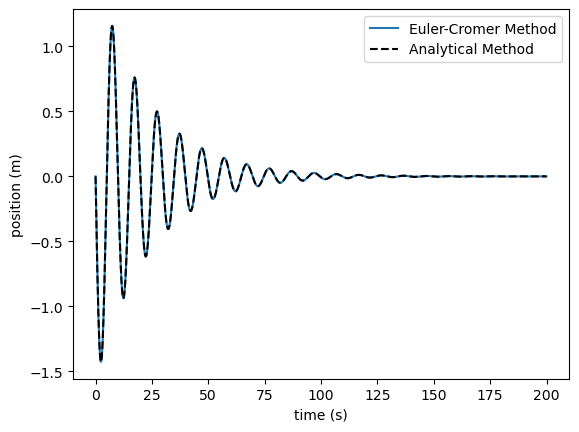

In [7]:
def Euler_Cromer(x0,v0,k,m,b,h,T):
    #initialize time, position and velocity.
    t = np.arange(0,T,h)
    nstep = len(t)
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    x[0] = x0
    v[0] = v0    
    #calculate the velocity and position by using the iterative equations.
    for i in range(nstep-1):
        a = -k / m * x[i] - b / m * v[i]
        v[i+1] = v[i] + h * a
        x[i+1] = x[i] + h * v[i+1]
    return x,v

x_cromer,v_cromer = Euler_Cromer(x0,v0,k,m,b,h,T)
plt.plot(t,x_cromer,label='Euler-Cromer Method')
plt.plot(t,x_expect,'k--',label='Analytical Method')
plt.xlabel('time (s)')
plt.ylabel('position (m)')
plt.legend()
plt.show()

## 1.5: Compare these four methods
It is obvious that when the time step increase, the accuracy of these numerical method will decrease. To clarify the difference between these four methods, we have changed the value of time step $h$ to 0.1 s.

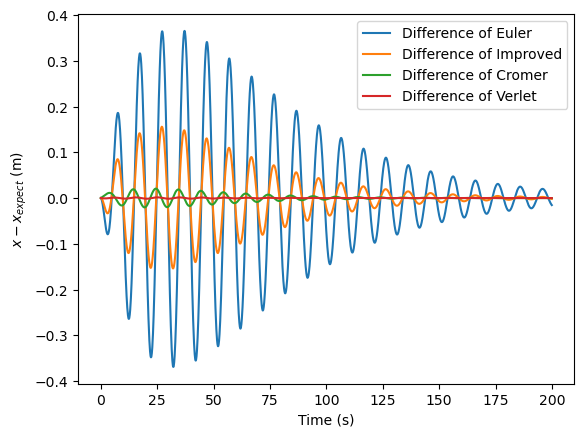

In [8]:
h = 0.1#s
#generate the corresponding time array.
t = np.arange(0,T,h)
nstep = len(t) 
#calculate the expected position and velocity by using the analytical function.
x_expect,v_expect = analytical(k,m,b,x0,v0,h,T)
#calculate the position and velocity by using these four numerical methods.
x_euler,v_euler = Euler(x0,v0,k,m,b,h,T)
x_improved,v_improved = Improved_Euler(x0,v0,k,m,b,h,T)
x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
x_cromer,v_cromer = Euler_Cromer(x0,v0,k,m,b,h,T)
#calculate the difference between the expected position.
difference_euler = x_euler - x_expect
difference_improved = x_improved - x_expect
difference_verlet = x_verlet - x_expect
difference_cromer = x_cromer - x_expect
#plot a figure.
plt.plot(t,difference_euler,label='Difference of Euler')
plt.plot(t,difference_improved,label='Difference of Improved')
plt.plot(t,difference_cromer,label='Difference of Cromer')
plt.plot(t,difference_verlet,label='Difference of Verlet')
plt.xlabel('Time (s)')
plt.ylabel('$x - x_{expect}$ (m)')
plt.legend()
plt.show()

From this figure, we can roughly find that the Verlet's Method is the best one. The second best method is the Euler-Cromer Method. The next one is the Improved Euler Method, and the last one is the Euler Method.


# 2: Influence of the time step
In order to compare these four methods, we should firstly determain a variable, $R$, which can show how accuracy of a specified method compared with the analytical method.   
$$R=ln(\frac{\sum_{i=0}^{N}|x_{a_i}-x_{m_i}|}{N})$$  
, where $x_{a_i}$ is the $i^{th}$  position term calculated from the analytical method, $x_{m_i}$ is the $i^{th}$ position term calculated from one of the four methods and $N$ is the total number of terms in the position function. The required accuracy we set is $R = ln(0.001)$.  

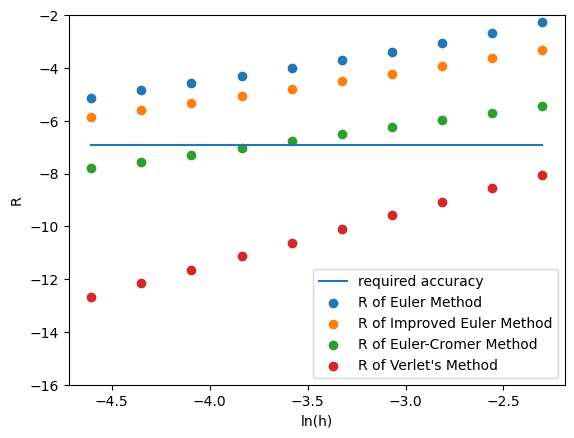

In [9]:
#defind a time step array.
h_array = np.geomspace(0.01,0.1,10)
#residual is the variable R, this residual is not the residual defined in the normal way.
residual_euler = np.array([])
residual_improved = np.array([])
residual_verlet = np.array([])
residual_cromer = np.array([])
for h in h_array:
    t = np.arange(0,T,h)
    nstep = len(t)
    #find the expect position and velocity arrays.
    x_expect,v_expect = analytical(k,m,b,x0,v0,h,T)
    #find position and velocity numreical solutions of four methods.
    x_euler,v_euler = Euler(x0,v0,k,m,b,h,T)
    x_improved, v_improved = Improved_Euler(x0,v0,k,m,b,h,T)
    x_verlet, v_verlet = Verlet(x0,v0,k,m,b,h,T)
    x_cromer, v_cromer = Euler_Cromer(x0,v0,k,m,b,h,T)
    #calculate the variable R
    residual_euler = np.append(residual_euler, np.log(np.sum(np.abs(x_expect - x_euler))/len(x_expect)))
    residual_improved = np.append(residual_improved, np.log(np.sum(np.abs(x_expect - x_improved))/len(x_expect)))
    residual_cromer = np.append(residual_cromer, np.log(np.sum(np.abs(x_expect - x_cromer))/len(x_expect)))
    residual_verlet = np.append(residual_verlet, np.log(np.sum(np.abs(x_expect - x_verlet))/len(x_expect)))
#because we want to plot R against ln(h)
h_array = np.log(h_array)
#plot the required accuracy straight line.
y = np.zeros(len(h_array)) + np.log(0.001)
plt.plot(h_array,y,label='required accuracy')
plt.scatter(h_array,residual_euler,label='R of Euler Method')
plt.scatter(h_array,residual_improved,label='R of Improved Euler Method')
plt.scatter(h_array,residual_cromer,label='R of Euler-Cromer Method')
plt.scatter(h_array,residual_verlet,label='R of Verlet\'s Method')
plt.xlabel('ln(h)')
plt.ylabel('R')
plt.ylim(-16,-2)
plt.legend()
plt.show()

We find these curves above are straight lines. Therefore, we can apply the least fit square method to find the gradient and the intercept. After calculating these two values, we can see the corresponding required value of h when $R = ln(0.001)$.
$$R=gradient*ln(h)+intercept$$  
$$gradient = \frac{⟨xy⟩-⟨x⟩⟨y⟩}{⟨x^2⟩-⟨x⟩⟨x⟩}$$  
$$intercept = \frac{⟨y⟩⟨x^2⟩-⟨xy⟩⟨x⟩}{⟨x^2⟩-⟨x⟩⟨x⟩}$$  
, where x is the $ln(h)$, y is the $R$.  
Therefore the required time step is  
$$h_{required}=e^{\frac{ln(0.001)-intercept}{gradient}}$$  
Here is the program to calculate the required values of $h$ for these four methods.

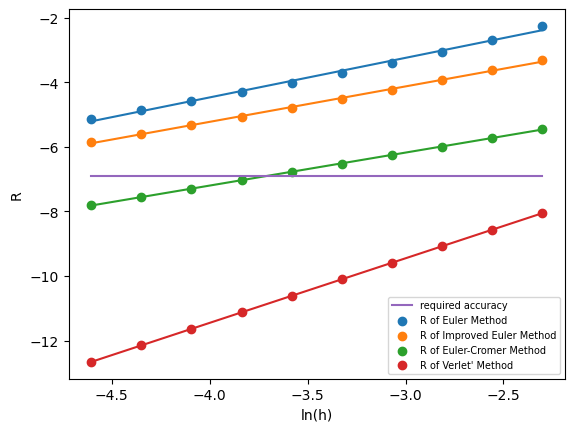

The required h of the Euler Method is 0.0025 s
The required h of the Improved Euler Method is 0.0012 s
The required h of the Euler Cromer Method is 0.024 s
The required h of the Verlet's Method is 0.18 s


In [10]:
def least_square(x,y):
    #calculate the gradient and the intercept.
    gradient = (np.mean(x*y) - np.mean(x)*np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
    interception = (np.mean(y)*np.mean(x**2)-np.mean(x*y)*np.mean(x)) / (np.mean(x**2)-np.mean(x)**2)
    return gradient,interception

def find_required_h(gradient,intercept):
    h_required = np.exp((np.log(0.001) - intercept) / gradient)
    return h_required

#here we start to find the gradient and interception by using the least_square function
gradient_euler,interception_euler = least_square(h_array,residual_euler)
gradient_improved,interception_improved = least_square(h_array,residual_improved)
gradient_cromer,interception_cromer = least_square(h_array,residual_cromer)
gradient_verlet,interception_verlet = least_square(h_array,residual_verlet)
#here we find the required time step of these four methods by using the find_required_h function
h_euler = find_required_h(gradient_euler,interception_euler)
h_improved = find_required_h(gradient_improved,interception_euler)
h_verlet = find_required_h(gradient_verlet,interception_verlet)
h_cromer = find_required_h(gradient_cromer,interception_cromer) 
#plot R against ln(h).
plt.scatter(h_array,residual_euler,label='R of Euler Method')
plt.plot(h_array,gradient_euler * h_array + interception_euler)
plt.scatter(h_array,residual_improved,label='R of Improved Euler Method')
plt.plot(h_array,gradient_improved*h_array+interception_improved)
plt.scatter(h_array,residual_cromer,label='R of Euler-Cromer Method')
plt.plot(h_array,gradient_cromer*h_array+interception_cromer)
plt.scatter(h_array,residual_verlet,label='R of Verlet\' Method')
plt.plot(h_array,gradient_verlet*h_array+interception_verlet)
plt.plot(h_array,y,label='required accuracy')
plt.xlabel('ln(h)')
plt.ylabel('R')
plt.legend(prop={"size":7})
plt.show()
print('The required h of the Euler Method is {0:0.2g} s'.format(h_euler))
print('The required h of the Improved Euler Method is {0:0.2g} s'.format(h_improved))
print('The required h of the Euler Cromer Method is {0:0.2g} s'.format(h_cromer))
print('The required h of the Verlet\'s Method is {0:0.2g} s'.format(h_verlet))

Therefore, the best method is the Verlet's Method whose required maximum time step is 0.18 s. In this case, the averaged uncertainty of position is 0.001 m.

# 3 Influence of the damping term
For the best method which is Verlet's Method, we have investigated the influence of the damping term when $b=0.5b_{cr}$, $b=b_{cr}$ and $b=2b_{cr}$, where $b_{cr}=2\sqrt{km}$ is the critical damping term.  
Here is the program to calculate positions in these three cases by using the Verlet's Method.

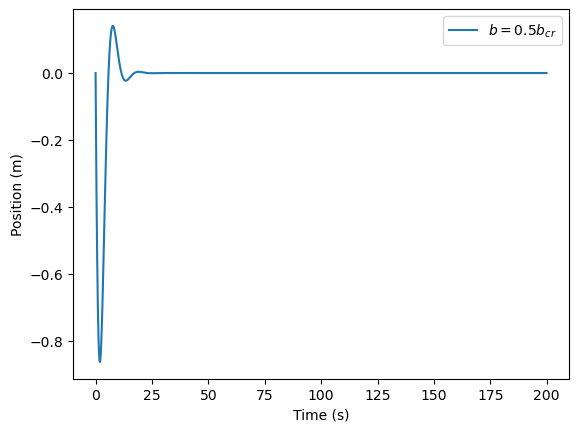

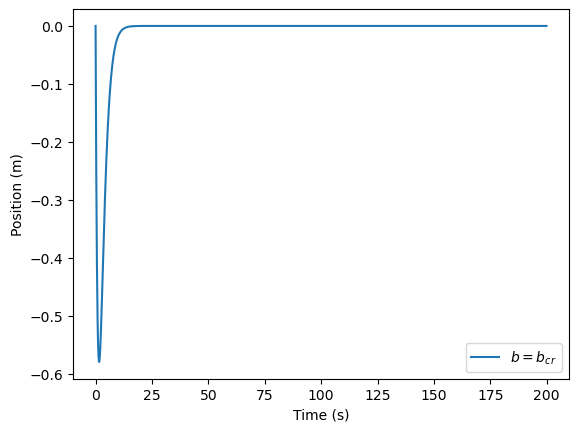

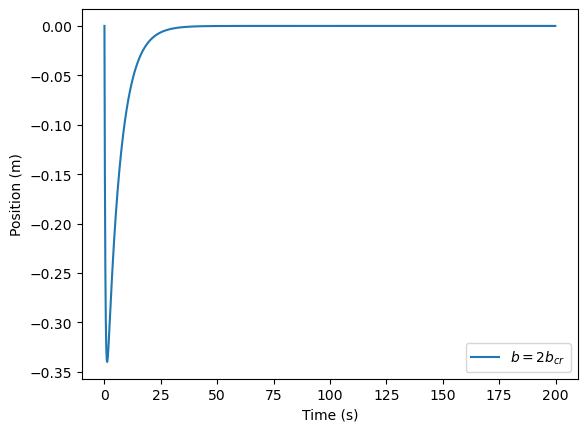

In [11]:
h = 0.1
t = np.arange(0,T,h)
nstep = len(t)
#calculate the value of the critical damping term.
bcr = 2 * np.sqrt(k * m) 
#define the damping term array with these three cases
b_array = np.array([0.5 * bcr, bcr, bcr * 2])
legend_label=np.array(['$b=0.5b_{cr}$','$b=b_{cr}$','$b=2b_{cr}$'])
for counter,b in enumerate(b_array):
    x_verlet = np.zeros(nstep)
    v_verlet = np.zeros(nstep)
    #calculate the position and velocity arrays at different damping term.
    x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.plot(t,x_verlet,label=legend_label[counter])
    plt.legend()
    plt.show()

From these three figures, we find:  
When $b < b_{cr}$, the underdamped oscillation happened. In this case, there is an oscillation in amplitudes.   
When $b = b_{cr}$, the critical damped oscillation happened. In this case, the amplitude dropped to zero with the highest speed.   
When $b > b_{cr}$, the overdamped oscillation happened. In this case, there is no oscillation in amplitudes.    

# 4 External Force 
## 4.1 Sudden Force
When there is an external force,$F(t)$, acting on the system, the equation of motion become:  
$$ma=-kx-bv+F(t)$$  
so the numerical equation of the acceleration is   
$$a_i = -\frac{k}{m}x_i - \frac{b}{m}v_i + F_i$$  
, where $F_i$ is the $i^{th}$ term of the external force.  
Since the numerical solution of speed and acceleration can be written as  
$$ v_i = \frac{x_{i+1} - x_{i-1}}{2h}$$  
$$ a_i = \frac{x_{i+1}+x_{i-1}-2x_{i}}{h^2}$$  
, substituting these two equations into the numerical equation of the acceleration, we can find the numerical equation of $x$ which are  $$x_{i+1} = \frac{4m-2kh^2}{2m+bh}x_i+\frac{bh-2m}{2m+bh}x_{i-1}+\frac{2h^2}{2m+bh}F_{i}$$  
When there is no external force, $F_i = 0$, this formuler will reduced to the equation we have derived. After calculating the $(i+1)^{th}$ term of the position, the $i^{th}$ term of the velocity is  
$$v_i=\frac{x_{i+1}-x_{i-1}}{2h}$$
Here is the program to calculate the position using these iterative equations when an external force acts on the system.

In [12]:
def Verlet_with_force(x0,v0,k,m,b,h,T,F):
    #This funciton is the Verlet's Method with external force acting on the system
    t = np.arange(0,T,h)
    nstep = len(t)
    x = np.zeros(nstep)
    v = np.zeros(nstep)
    x[0] = x0
    v[0] = v0
    #A,B,C,D are constants in calculating the position function.
    D = 2 * m + b * h
    A = 2 * (2 * m - k * h**2) / D
    B = (b * h - 2 * m) / D
    C = 2 * h**2 / D
    # We still need to calculate x1 by improved euler method.
    a = -(k / m) * x[0] - (b / m) * v[0] + F[0]
    x[1] = x0 + h * v[0] + h**2 / 2 * a
    for i in np.arange(1, nstep-1):
        #calculate position and velocity by using iterative equations
        x[i+1] = A * x[i] + B * x[i-1] + C * F[i]
        v[i] = (x[i+1] - x[i-1]) / (2 * h)
    # We still need to calculate the last term of the velocity outside the cycle.
    a = -(k / m) * x[-2] - (b / m) * v[-2] + F[-2]
    v[-1] = v[-2] + h * a
    return x,v

There are two cases when a sudden application of an external force acting on the system:  
1. When the external force is acting along the opposite direction of the oscillation.

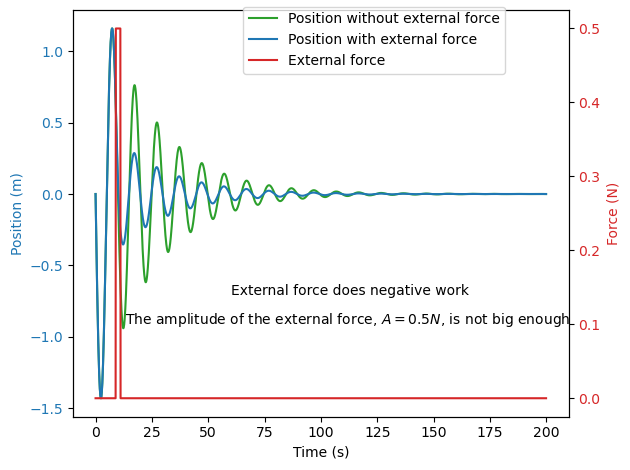

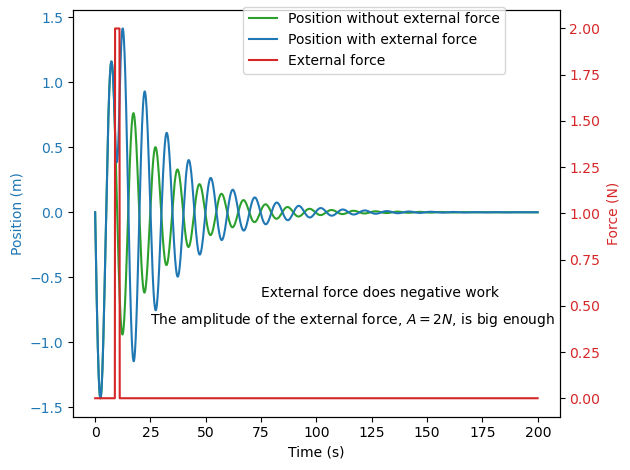

In [13]:
def sudden_external_force(duration, amplitude,start_external,location,text):
    #Calculate the position array if there is no external force
    x_verlet, v_verlet = Verlet(x0,v0,k,m,b,h,T)
    x_force = np.zeros(nstep)
    v_force = np.zeros(nstep)
    #Define the external force array
    Force_external = np.zeros(nstep)
    #Generate the corresponding sudden external force array.
    #Because we need to convert second in to index, we divided start and end time by the time step.
    Force_external[int(start_external/h):int((start_external + duration) / h)+1] = amplitude
    #Find the position and velocity array when there is an external force acting on the system.
    x_force,v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
    #plot the position curves
    fig, ax1 = plt.subplots()
    ax1.plot(t,x_verlet,label='Position without external force',color='tab:green')
    ax1.plot(t,x_force,label='Position with external force',color='tab:blue')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Position (m)',color='tab:blue')
    ax1.tick_params(axis='y',labelcolor='tab:blue')
    #plot the external force curve
    ax2 = ax1.twinx()
    ax2.plot(t,Force_external,label='External force',color='tab:red')
    ax2.set_ylabel('Force (N)',color='tab:red')
    ax2.tick_params(axis='y',labelcolor='tab:red')
    fig.legend(loc=1,bbox_to_anchor=(0.8,0.98))
    fig.tight_layout()
    plt.text(location[0][0],location[0][1],text[0])
    plt.text(location[1][0],location[1][1],text[1].format(amplitude))
    plt.show()
    return x_force, v_force, Force_external

b = 0.2
h = 0.1
T = 200
t = np.arange(0,T,h)
nstep = len(t)
#calculate the natural angular frequency
w0 = np.sqrt(k/m)
gamma = b / m
#calculate the angular frequency and the period.
w = np.real(cmath.sqrt(w0**2 - gamma**2 / 4))
period = 2 * np.pi / w
#define the start time of applying external force in second.
#when the external force is in the opposite direction of the oscillation
start_external = int(1 * period) #s
#define the duration and the amplitude of the external force.
#when the amplitude of the external force is not big enough
duration = 2 #s
amplitude = 0.5 #N
#location of two texts in the figure.
location = np.array([[60,0.14],[13,0.1]])
#define the text array.
text = ['External force does negative work','The amplitude of the external force, $A={0} N$, is not big enough']
x_force, v_force, Force_external = sudden_external_force(duration,amplitude,start_external,location,text)
# when the amplitude of the external force is big enough
amplitude = 2 #N
location = np.array([[75,0.55],[25,0.40]])
text = ['External force does negative work','The amplitude of the external force, $A={0} N$, is big enough']
x_force, v_force, Force_external = sudden_external_force(duration,amplitude,start_external,location,text)

In this case, the external force does negative work. It will decrease the amplitude of the oscillation until it reverses the direction of the oscillation and then increases the amplitude, which means when the external force's amplitude is big enough, two position curves will be out of phase.   

2. When the external force is in the direction of the oscillation. 

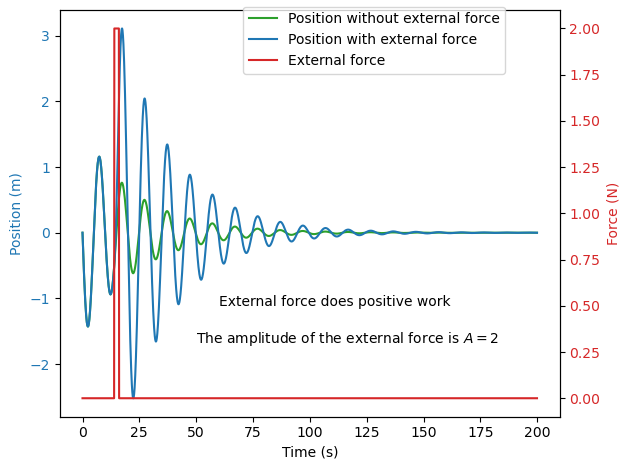

In [14]:
# External force is in the direction of the oscillation.
start_external = int(1.5 * period) #s
duration = 2 #s
amplitude = 2 #N
location = np.array([[60,0.50],[50,0.30]])
text = ['External force does positive work','The amplitude of the external force is $A={0}$']
x_force, v_force, Force_external = sudden_external_force(duration,amplitude,start_external,location,text)

In this case, the external force will do positive work on the system. Therefore, the amplitude of the position will increase. Two position curves will be in the same phase. 

Since the energy is conserved before and after the external force acting on the system, we can check if this method is correct by calculating the energy before and after applying the external force and the total energy given by the external force and the damping force. These three values of energy should obey
$$E_{after}=E_{before}+E_{given}$$  
The total energy is given by the addition of the kinetic energy and the potential energy   
$$E = \frac{1}{2}mv^2+\frac{1}{2}kx^2$$  
Here is the program to calculate the $E_{after}$ and the $E_{before}$ of the above case.

Energy_before = 0.44 J
Energy_after = 4.69 J
Energy_given_expect = 4.25 J


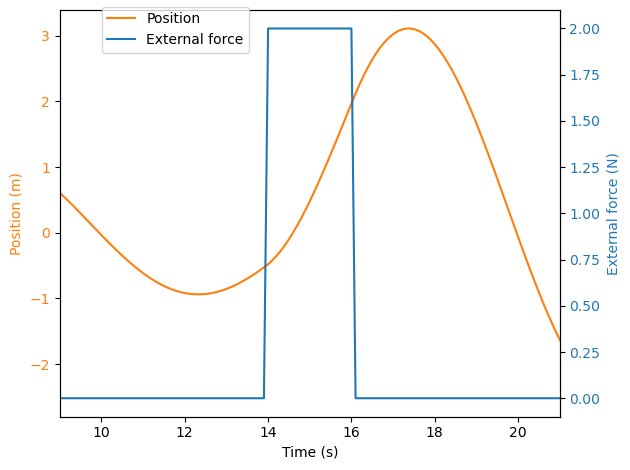

In [15]:
#calculate the start index of the external force
start_index = int(start_external/h)
#calculate the end index of the external force
end_index = int((start_external + duration) / h)
#calculate the energy before and after the external force acting on the system.
energy_before = 0.5 * k * x_force[start_index]**2 + 0.5 * m * v_force[start_index]**2
energy_after = 0.5 * k * x_force[end_index]**2 + 0.5 * m * v_force[end_index]**2
#calculate the expected energy given by the external force and the damping force.
energy_given_expect = energy_after - energy_before
print('Energy_before = {0:0.2f} J'.format(energy_before))
print('Energy_after = {0:0.2f} J'.format(energy_after))
print('Energy_given_expect = {0:0.2f} J'.format(energy_given_expect))
fig, ax1 = plt.subplots()
ax1.plot(t,x_force,label='Position',color='tab:orange')
ax1.set_xlim(start_external-5, start_external+duration+5)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)',color='tab:orange')
ax1.tick_params(axis='y',labelcolor='tab:orange')
ax2 = ax1.twinx()
ax2.plot(t,Force_external,label='External force')
ax2.set_ylabel('External force (N)',color='tab:blue')
ax2.tick_params(axis='y',labelcolor='tab:blue')
fig.tight_layout()
plt.xlim(start_external-5,start_external+duration+5)
fig.legend(loc=1,bbox_to_anchor=(0.4,0.98))
plt.show()

As for the energy given by the external force and the damping force, we can calculate it by sum the small energy given in each small time interval, which are
$$\Delta E_i = A\Delta x_i - bv_i\Delta x_i$$
, where $A$ is the amplitude of the external force. Therefore, the total energy given by these two forces is 
$$E_{given} = \sum_{i = start}^{end}{\Delta E_i}$$
, where start and end are just the start index and the end index of the external force.  
Because in section 2, Influence of the time step, we have calculated the gradient and intercept of the Verlet's method, we can calculate the averaged uncertainty of the position,$u_x$, for a given $h$. By using this uncertainty, the uncertainty of $E_{given}$ is
$$u_{E given} = Au_{x} + bv_iu_{x}$$  
,where $u_{x} = e^{gradient \times ln(h) + intercept}$.


In [16]:
def find_energy_given(start,end,list_x,list_v):
    #In this function we calculate the energy given by the external force and the damping force.
    energy = 0
    energy_uncertainty = 0
    for counter in np.arange(start+1,end+1,1):
        #we start from the second point. 
        #calculate the change in position
        length = list_x[counter] - list_x[counter - 1]
        #calculate the damping force which is always in the opposite direction of the velocity.
        force_damping = -b * list_v[counter]
        #calculate the energy given by the damping force.
        energy_damping = force_damping * length
        #calculate the energy given by the external force.
        energy_external = amplitude * length
        energy = energy + energy_damping + energy_external
        energy_uncertainty += (position_uncertainty * amplitude + position_uncertainty * force_damping)
    return energy,energy_uncertainty

#calculate the averaged position uncertainty by using the gradient and intercept shown in the section 2.
position_uncertainty = np.exp(gradient_verlet * np.log(h) + interception_verlet)
#calculate the given energy and the uncertainty of it
energy_change,energy_uncertainty = find_energy_given(start_index,end_index,x_force,v_force)
print('Energy_given = {0:0.2f} J'.format(energy_change))
print('Energy_given_uncertainty = {0:0.2f} J'.format(energy_uncertainty))

Energy_given = 4.24 J
Energy_given_uncertainty = 0.01 J


The expected given energy is $4.25$ J which is within the calculated given energy $4.24\pm 0.01$ J. Therefore, the method we used to calculate the position is correct. 

## 4.2: Period external force
In this case, the external force is a sinusoidal function. 
$$F_{external} = Acos(\omega t)$$
By using a similar method when dealing with the sudden forcer case, we can plot the position curve with a sinusoidal external force acting on it.  
we have investigated three cases:  
1.  When the angular frequency of the external force is smaller than the natural angular frequency.  

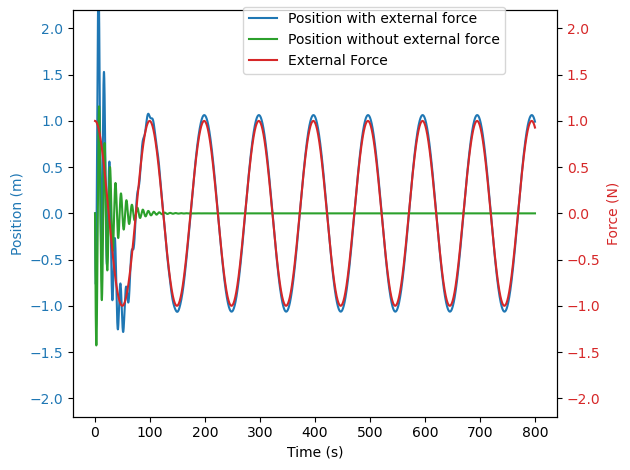

In [17]:
b = 0.2
h = 0.05
amplitude = 1 
T = 800 
t = np.arange(0,T,h)
nstep = len(t)
Force_external = np.zeros(nstep)
#calculate the natural angular frequency of the oscillation system
w0 = np.sqrt(k / m)
#when the angulare frequency of the external force is smaller than that the natural angular frequency
w = 0.1 * w0
#Generate the external force array
Force_external = amplitude * np.cos(w * t)
#Find the position with the external force and that without the external force
x_force, v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
#plot the figure.
fig,ax1 = plt.subplots()
ax1.plot(t,x_force,label='Position with external force',color='tab:blue')
ax1.plot(t,x_verlet,label='Position without external force',color='tab:green')
ax1.set_ylim(-2.2,2.2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Position (m)',color='tab:blue')
ax1.tick_params(axis='y',labelcolor='tab:blue')
ax2 = ax1.twinx()
ax2.plot(t,Force_external,label='External Force',color='tab:red')
ax2.set_ylabel('Force (N)',color='tab:red')
ax2.set_ylim(-2.2,2.2)
ax2.tick_params(axis='y',labelcolor='tab:red')
fig.legend(loc=1,bbox_to_anchor=(0.8,0.98))
fig.tight_layout()
plt.show()

In this case, after the transient period, the system will oscillate in the same angular frequency as that of the external force. The amplitude of the position is slightly bigger than that of the external force. These two curves have a similar phase. 


2. When the angular frequency of the external force is bigger than that of the natural angular frequency.  

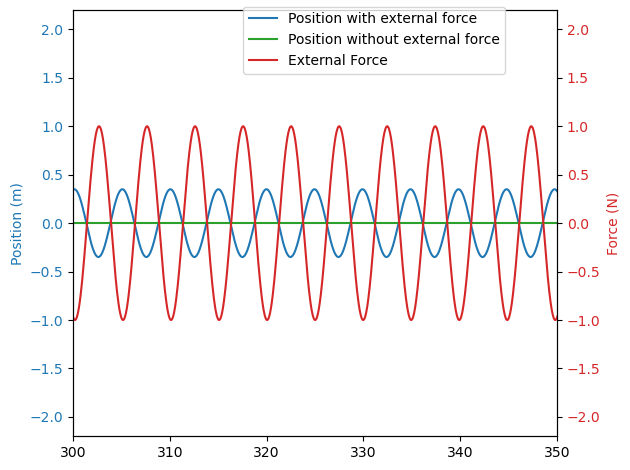

In [18]:
# The angular frequency of the external force is bigger than the natural frequency
w = 2 * w0
Force_external = amplitude * np.cos(w * t)
x_force, v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
#plot a figure
fig,ax1 = plt.subplots()
ax1.plot(t,x_force,label='Position with external force',color='tab:blue')
ax1.plot(t,x_verlet,label='Position without external force',color='tab:green')
ax1.set_ylim(-2.2,2.2)
ax1.set_ylabel('Position (m)',color='tab:blue')
ax1.tick_params(axis='y',labelcolor='tab:blue')
ax1.set_xlim(300,350)
ax2 = ax1.twinx()
ax2.plot(t,Force_external,label='External Force',color='tab:red')
ax2.set_ylabel('Force (N)',color='tab:red')
ax2.set_ylim(-2.2,2.2)
ax2.tick_params(axis='y',labelcolor='tab:red')
fig.legend(loc=1,bbox_to_anchor=(0.8,0.98))
fig.tight_layout()
plt.show()

 In this case, because curves are too narrow to be seen clearly, we have generated a figure between 300 s and 350 s, which is after the transient period. We find the position's amplitude is smaller than that of the external force and these two curves are roughly out of phase.

3. When the angular frequency of the external force is close to the natural frequency.  

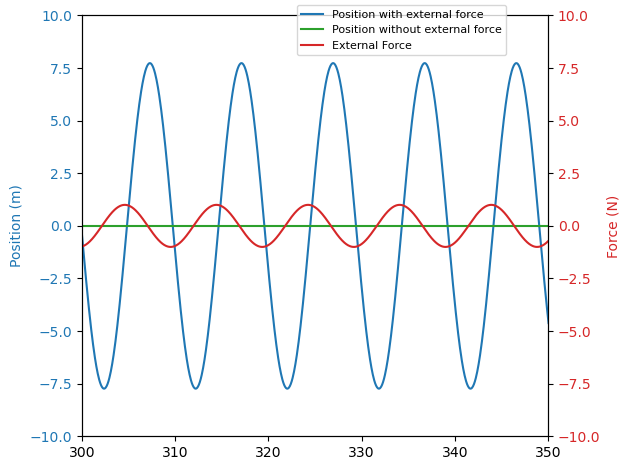

In [19]:
# The angular frequency of the external force is close to the natural frequency
w = 1.01 * w0
Force_external = amplitude * np.cos(w * t)
x_force, v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
x_verlet,v_verlet = Verlet(x0,v0,k,m,b,h,T)
#plot a figure
fig,ax1 = plt.subplots()
ax1.plot(t,x_force,label='Position with external force',color='tab:blue')
ax1.plot(t,x_verlet,label='Position without external force',color='tab:green')
ax1.set_ylabel('Position (m)',color='tab:blue')
ax1.tick_params(axis='y',labelcolor='tab:blue')
ax1.set_ylim(-10,10)
ax2 = ax1.twinx()
ax2.plot(t,Force_external,label='External Force',color='tab:red')
ax2.set_ylabel('Force (N)',color='tab:red')
ax2.tick_params(axis='y',labelcolor='tab:red')
fig.legend(loc=1,bbox_to_anchor=(0.8,0.98),prop={'size':8})
fig.tight_layout()
ax1.set_xlim(300,350)
ax2.set_ylim(-10,10)
plt.show()

In this case, the figure's time range is still between 300 s and 350 s, which is after the transient period for the same reason as above. We find the amplitude of the position is much bigger than that of the external force. The phase difference between these two curves is roughly $\frac{1}{2}\pi$. In this case, the resonance happens.

# 5: Resonance
We investigate the resonance effect in three parts.   
We first investigate the amplitude of the position curves at various angular frequency ranging from 0.5 times of the natural frequency to 2 times of that. We expect the amplitude of the position curves behaves like 
$$A(\omega) = \frac{F_0}{m\sqrt{(\omega_0^2-\omega^2)^2+\omega^2\gamma^2}}$$  
, where $A(\omega)$ is the amplitude of the position curve in terms of the external force's angular frequency.

The resonance angular frequency is 0.63 rad/s
The natural angular frequency is 0.63 rad/s


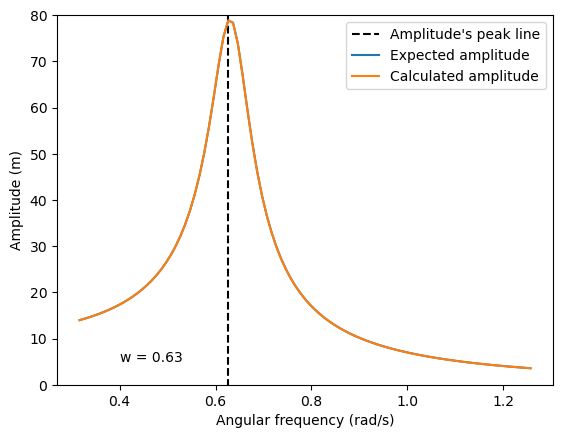

In [20]:
w0 = np.sqrt(k / m)
# generate the angular frequency array
w_array = np.arange(0.5*w0,2*w0,0.01)
h = 0.1
T = 500
t = np.arange(0,T,h)
nstep = len(t)
gamma = b / m
amplitude = 10
#generate the calculated position's amplitude array and the expect position'amplitude array.
A_theory = np.array([])
A_figure = np.array([])
for w in w_array:
    #Generate the external force array.
    Force_external = amplitude * np.cos(w * t)
    x_force, v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
    #calculate the expected amplitude.
    A_theory = np.append(A_theory, amplitude / (m * np.sqrt((w0**2 - w**2)**2 + w**2 * gamma**2)))
    #define the start index of finding the position's amplitude which is after the transient period.
    start_index = int(400 / h)
    #find the position's amplitude which is the maximum value of position after the transient period.
    A_figure = np.append(A_figure, np.max(x_force[start_index:]))
#find the corresponding angular frequency when the amplitude reaches its maximum point.
w_max_index = np.where(A_figure==np.max(A_figure))[0][0]
w_max = w_array[w_max_index]
print('The resonance angular frequency is {0:0.2f} rad/s'.format(w_max))
print('The natural angular frequency is {0:0.2f} rad/s'.format(w0))
#plot a vertical straight line when the angular frequency is equal to the natural angular frequency.
w_max_y = np.arange(-10,90,1)
w_max_x = np.zeros(len(w_max_y)) + w_max
plt.plot(w_max_x,w_max_y,'k--',label='Amplitude\'s peak line')
plt.plot(w_array,A_figure,label='Expected amplitude')
plt.plot(w_array,A_theory,label='Calculated amplitude')
plt.xlabel('Angular frequency (rad/s)')
plt.ylabel('Amplitude (m)')
plt.text(0.4,5,'w = {0:0.2f}'.format(w_max))
plt.ylim(0,80)
plt.legend()
plt.show()

From this figure, we find that when the angular frequency increases, the amplitude also increases until the angular frequency is equal to the natural frequency. After the natural frequency, the amplitude will decrease with increase of the angular frequency. The corresponding angular frequency at the maximum amplitude is 0.63 rad/s which is same as the natural frequency. However, this does not suggest that the natural frequency is the frequency of the resonance. Because from the equation of the expected amplitude, we find that the resonance happened when the derivative of the expected amplitude equation equals zero. The angular frequency, in this case, is not the natural angular frequency but close to it.

We secondly investigate the phase difference between the external force curve and the position curve. We expected the phase difference obeys:  
$$ \delta(\omega)_{expect}=arctan(\frac{\gamma\omega}{\omega_0^2-w^2})$$  
, where $\delta(\omega)$ is the phase difference between the external force curve and the position curve, which is defined between 0 to $\pi$. The domain of $\omega$ is between 0.5 times the natural angular frequency and 2 times the natural angular frequency.  
We first calculate the phase difference by finding the time difference,$\Delta t$, between two adjacent maximum points of the external curve and the position curve. Then, the phase difference will be  
$$\delta(\omega)_{calculate} =2\pi\frac{\Delta t}{T}$$  
The major uncertainty, in this case, is the peak's time. Each peak we find in the program has uncertainty equals to $\frac{h}{2}$ in second. Therefore, the uncertainty of phase given by the peak is  
$$Uncertainty = 2\pi\frac{\sqrt{2(0.5h)^2}}{T}=\frac{\pi\sqrt{2}h}{T}$$  
From this uncertainty equation, we expect that as $\omega$ increased, the uncertainty of phase difference will increase since the period will decrease. Therefore, we will see an obvious fluctuation of phase difference when $\omega$ increase.

The goodness of this method is 0.0616
When the angular frequency is natural frequence, the phase difference is 1.58 rad


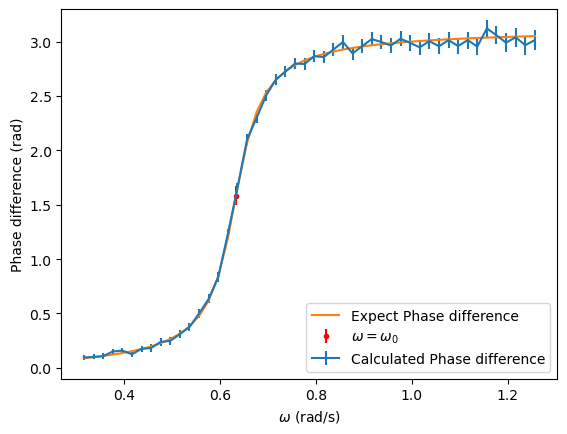

In [21]:
def find_max_position(start,end,list_):
    max_position = np.array([])
    for counter, number in enumerate(list_[start:end]):
        #since the maximum point is bigger than the last one and also the next one.
        if number > list_[counter-1+start] and number > list_[counter+1+start]:
            max_position = np.append(max_position,counter+start)
    return max_position

def find_phase(w):
    #fenerate the external force array
    Force_external = amplitude * np.cos(w * t)
    #find the position with the external force acting on the system.
    x_force,v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
    period = np.pi * 2 / w
    #define the time interval in which we find maximum points
    start = int(300 / h)
    end = int((300 + 2.5*period) / h)
    #find the time of position curve's maximum point.
    max_x_force = find_max_position(start,end,x_force) * h
    #find the time of external force curve's maximum point.
    max_force_external = find_max_position(start,end,Force_external) * h
    #find the phase different
    phase = (max_x_force[0] - max_force_external[0]) / period * 2 * np.pi
    if phase < 0:
        #because the phase we defined is bigger than 0.
        #in this case, we need to calculate the phase difference using next two points.
        phase = (max_x_force[1] - max_force_external[0]) / period * 2 * np.pi
    #calculate the uncertainty of phase difference.
    phase_uncertainty = np.sqrt(2) * h * np.pi / period
    return phase, phase_uncertainty

b = 0.2
h = 0.1
gamma = b / m
amplitude = 1 
T = 800 
t = np.arange(0,T,h)
nstep = len(t)
Force_external = np.zeros(nstep)
#calculate the natural angular frequency of the oscillation system
w0 = np.sqrt(k / m)
#define the angular frequency array of the external force
w_array = np.arange(0.5*w0,2*w0,0.02)
phase_array = np.array([])
phase_uncertainty_array = np.array([])
for w in w_array:
    phase, phase_uncertainty = find_phase(w)
    phase_array = np.append(phase_array,phase)
    phase_uncertainty_array = np.append(phase_uncertainty_array,phase_uncertainty)
#calculate the expected phase difference
expect_angle = np.arctan(gamma * w_array / (w0**2 - w_array**2))
#because the phase difference we defined is bigger than 0.
#we find the indexes whose values are smaller than zero.
negative_position = np.where(expect_angle<=0)[0]
if len(negative_position) > 0:
    #if there are some values smaller than zero, we need to add pi on it.
    expect_angle[negative_position[0]:] += np.pi
#calculate the goodness of this method
goodness = np.sum((expect_angle - phase_array)**2)
print('The goodness of this method is {0:0.4f}'.format(goodness))
#Calculate the phase difference when angular frequency is the natural frequency
phase_w0,phase_uncertainty_w0 = find_phase(w0)
plt.errorbar(w0,phase_w0,phase_uncertainty,label='$\omega = \omega_0$',color = 'red',fmt='o',ms=3)
print('When the angular frequency is natural frequence, the phase difference is {0:0.2f} rad'.format(phase_w0))
plt.errorbar(w_array,phase_array,phase_uncertainty_array,label='Calculated Phase difference')
plt.plot(w_array,expect_angle,label='Expect Phase difference')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('Phase difference (rad)')
plt.ylim(-0.1,3.3)
plt.legend()
plt.show()

From this figure, we find when $\omega = \omega_0$, the corresponding phase difference is 1.58 rad which is similar to $\frac{1}{2}\pi$. When the resonance happens, the phase difference is roughly $\frac{1}{2}\pi$ which has mentioned in the Period External Force part. The phase difference increases with $\omega$ increases but always smaller than $\pi$.  
We have two methods to increase the accuracy.   
1. we can decrease the value of the time step. However, the disadvantage of this method is that we will spend a lot of time calculating the position array by using the numerical method.
2. Instead of calculating the time difference between two peaks, we calculate the averaged time difference between two peak arrays. Compared with the first method, the time also increases, but it is much smaller than the first method.    

Therefore, we adopt the second method.
In the following program, we decide to calculate the averaged phase difference using roughly 20 peaks for each curve. In this case, the uncertainty of phase difference should be  
$$Uncertainty = 2\pi\frac{\sqrt{0.5h^2\times20}}{20\times T}=\frac{\pi\sqrt{10}h}{10T}$$  

The goodness of this method is 0.0013


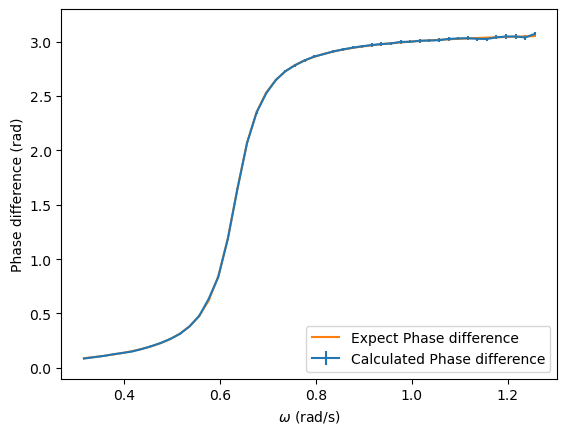

In [22]:
def find_phase_accuracy(w):
    #Generate the external force array
    Force_external = amplitude * np.cos(w * t)
    #find the position with the external force acting on the system.
    x_force,v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
    period = np.pi * 2 / w
    #Define the time interval in which we find maximum points
    start = int(300 / h)
    #In this case, we decide to use roughly 20 peaks for each curve.
    end = int((300 + 20 * period) / h)
    #Find the times of position curve's maximum points
    max_x_force = find_max_position(start,end,x_force) * h
    #Find the times of external force curve's maximum points
    max_force_external = find_max_position(start,end,Force_external) * h
    min_length = np.min([len(max_x_force),len(max_force_external)])
    #find the averaged phase difference
    phase = np.mean((max_x_force[0:min_length] - max_force_external[0:min_length]) / period * 2 * np.pi)
    if phase < 0:
    #Because the phase we defined is bigger than 0.
    #In this case, we need to calculate the phase difference by the next two points.
        phase = np.mean((max_x_force[1:min_length] - max_force_external[0:min_length-1]) / period * 2 * np.pi)
    phase_uncertainty = np.sqrt(10) * np.pi * h / (10 * period)
    return phase, phase_uncertainty

Force_external = np.zeros(nstep)
#Define the angular frequency of the external force
w_array = np.arange(0.5*w0,2*w0,0.02)
phase_array = np.array([])
phase_uncertainty_array = np.array([])
for w in w_array:
    phase, phase_uncertainty = find_phase_accuracy(w)
    phase_array = np.append(phase_array,phase)
    phase_uncertainty_array = np.append(phase_uncertainty_array,phase_uncertainty)
#calculate the goodness of this method
goodness = np.sum((expect_angle - phase_array)**2)
print('The goodness of this method is {0:0.4f}'.format(goodness))
plt.errorbar(w_array,phase_array,phase_uncertainty_array,label='Calculated Phase difference')
plt.plot(w_array,expect_angle,label='Expect Phase difference')
plt.xlabel('$\omega$ (rad/s)')
plt.ylabel('Phase difference (rad)')
plt.ylim(-0.1,3.3)
plt.legend()
plt.show()

After applying the new method, the phase difference line's goodness has been reduced from 0.0616 to 0.0013.

The third part is about power.  
We want to calculate the external force's averaged power during one period when the angular frequency ranges from 0.5 times the natural angular frequency to 2 times the natural angular frequency.  
The averaged power during one period of an oscillation is given by
$$P(\omega)=\frac{E_{period}}{T}$$  
The $E_{period}$ can be calculated from the external force which is 
$$E_{period} = \sum_{i=start}^{end}{\Delta E_i} = \sum_{i=start}^{end}{F_i(x_{i+1}-x_{i-1})}$$
, where start is the start index of a period and end is the end index of a period.


The resonance angular frequency is 0.64 rad/s
The natural angular frequency is 0.63 rad/s


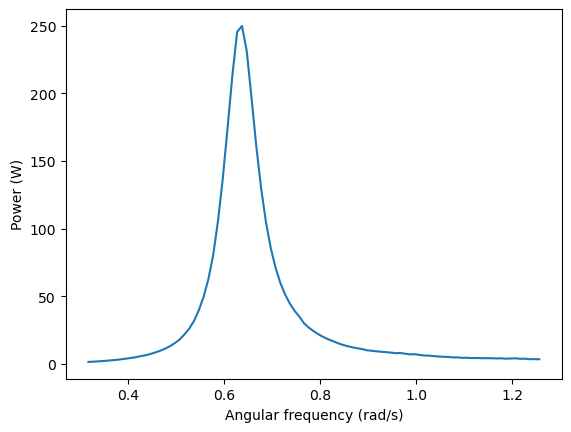

In [23]:
b = 0.2
h = 0.1
amplitude = 10 #N
T = 500 #s
t = np.arange(0,T,h)
nstep = len(t)
#define the power array
power_array = np.array([])
w0 = np.sqrt(k / m)
w_array = np.arange(0.5*w0,2*w0,0.01)
for w in w_array:
    #generate the external force array
    Force_external = np.zeros(nstep)
    Force_external = amplitude * np.cos(w * t)
    #calculate the position and velocity when there is force acting on the system.
    x_force, v_force = Verlet_with_force(x0,v0,k,m,b,h,T,Force_external)
    period = 2 * np.pi / w
    #the start point is after the transient period
    start_index = int(300/h)
    #the end point is one period after the start point
    end_index = int((300+period) / h)
    energy = 0
    power = 0
    for counter in np.arange(start_index,end_index+1,1):
        #calculate the energy
        energy += (Force_external[counter] * (x_force[counter+1]-x_force[counter]))
    #calculate the power
    power = energy / period
    power_array = np.append(power_array,power)
#find the angular frequency when the power have the maximum value.
w_max_index = np.where(power_array==np.max(power_array))[0][0]
w_max = w_array[w_max_index]
print('The resonance angular frequency is {0:0.2f} rad/s'.format(w_max))
print('The natural angular frequency is {0:0.2f} rad/s'.format(w0))
plt.plot(w_array,power_array)
plt.ylabel('Power (W)')
plt.xlabel('Angular frequency (rad/s)')
plt.show()

Like the amplitude case, the power curve will increase until the angular frequency equals the rough value of the natural frequency, after which it will start to decrease.

# 6: Conclusion
In this project, we have investigated The Damped Harmonic Oscillator by using the numerical method. We first calculate the position and velocity arrays using four numerical methods when there is no external force acting on the system and compare it with the analytical solution. After plotting the accuracy quantity figure with various time steps, we find Verlet's method is the best one. Therefore, we use this method to investigate when there is an external force acting on the system. When the external force is a suddenly changed force, the position's amplitude will increase or decrease depending on the external force's direction. When the external force is a periodical changed force, after the transient period, the position's angular frequency will be same as that of the external force. The amplitude and the phase difference will be changed at different angular frequencies of the external force. In the resonance section, we have investigated the influence on the amplitude, phase difference and the averaged power supply by the external force at various angular frequency. The amplitude of the position and the power supply will increase with the angular frequency increase until it equals the point close to the natural angular frequency and then starts to decrease. The phase difference will increase from 0 to $\pi$. When the resonance happens, the phase difference is $\frac{1}{2}\pi$. 